## Observations and Insights 

* Based on the final tumor volumes, Ramicane appears to be the drug regimen that was most effective overall.
* Results for the Capomulin regimen show that the heavier the mouse in weight, the higher the tumor volume. This means that the heavier the mouse was, the less effective the regimen was. 
* Based on the final tumor volumes, Ketapril appears to be the drug regimen that was the least effective overall.

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [193]:
# Checking the number of mice.
total_mice = complete_data['Mouse ID'].nunique()
print(f"The number of unique mice IDs is: {total_mice}")

The number of unique mice IDs is: 249


In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id_timepoint = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
dup_id_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = complete_data[complete_data['Mouse ID'] == 'g989']
dup_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data = complete_data[complete_data['Mouse ID'] != 'g989']

In [197]:
# Checking the number of mice in the clean DataFrame.
total_mice = complete_data['Mouse ID'].nunique()
print(f"The updated number of unique mice IDs is: {total_mice}")

The updated number of unique mice IDs is: 248


## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug regimen
groupedby_regimen = complete_data.groupby(['Drug Regimen'])

# Get tumor volume mean by regimen
tumor_mean = groupedby_regimen['Tumor Volume (mm3)'].mean()
# Get tumor volume median by regimen
tumor_median = groupedby_regimen['Tumor Volume (mm3)'].median()
# Get tumor volume variance by regimen
tumor_var = groupedby_regimen['Tumor Volume (mm3)'].var()
# Get tumor volume standard deviation by regimen
tumor_sd = groupedby_regimen['Tumor Volume (mm3)'].std()
# Get tumor volume SEM by regimen
tumor_sem = groupedby_regimen['Tumor Volume (mm3)'].sem()

# Create summary dataframe
tumor_summary = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_var,
                              "Stand. Deviation": tumor_sd,
                              "Stand. Error on Means": tumor_sem})
# Display
tumor_summary

,Mean,Median,Variance,Stand. Deviation,Stand. Error on Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line of code
tumor_summary_two = complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(Mean='mean',Median='median',Variance='var',StandDeviation='std',SEM='sem')

# Display
tumor_summary_two

,Mean,Median,Variance,StandDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

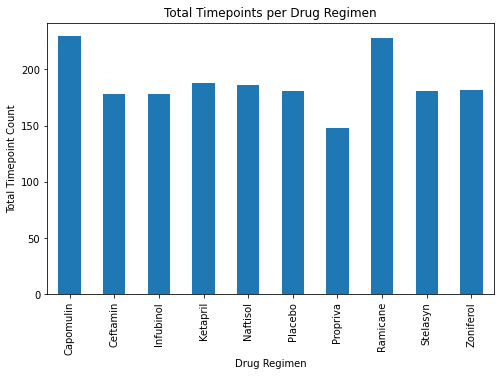

In [200]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by Timepoint count
timepoint_pd = groupedby_regimen['Timepoint'].count()

# Generate bar plot
timepoint_pd.plot(kind="bar", figsize=(8,5))

# Add labels
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoint Count")

# Display
plt.show()

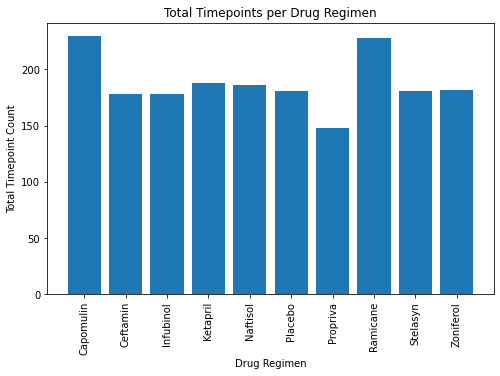

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=[8,5])
plt.bar(timepoint_pd.index, timepoint_pd.values)

# Add labels
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoint Count")
plt.xticks(rotation='vertical')

# Display
plt.show()


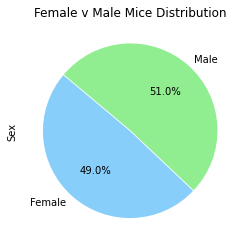

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get sex count
gender = complete_data.groupby(['Sex'])['Sex'].count()

# Seperate section(s)
explode = (0,0.01)

# Assign colors 
colors = ["lightskyblue", "lightgreen"]

# Plot pie chart
gender.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, title='Female v Male Mice Distribution')




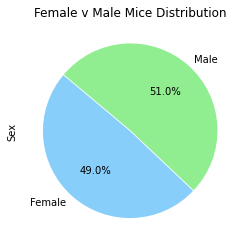

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Section labels
labels=["Female", "Male"]

#Plot chart
plt.pie(gender, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, labels=labels)

# Add labels
plt.title("Female v Male Mice Distribution")
plt.ylabel("Sex")

# Display
plt.show()


## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_data.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp_df = pd.merge(complete_data, last_timepoint, how='right', on=('Mouse ID', 'Timepoint'))

# Display
last_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [205]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    treatment = last_tp_df.loc[last_tp_df["Drug Regimen"] == regimen]
    volume = treatment["Tumor Volume (mm3)"]

    # add subset and append to list
    tumor_vol.append(volume)
    
    # Calculate the IQR and quantitatively 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Check for outliers
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    
    # Print results
    print(f"\n{regimen}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outlier Count: {outliers.count()}")
    # Print the outlier value if it exists
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Final Tumor Volume (mm3) Outlier Value: {outliers[i]}")
    


Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outlier Count: 0

Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Outlier Count: 0

Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outlier Count: 1
Final Tumor Volume (mm3) Outlier Value: 36.321345799999996

Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Outlier Count: 0


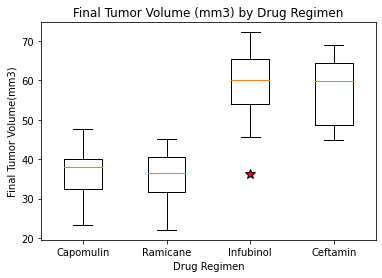

In [206]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_vol, labels=regimens, flierprops={'markerfacecolor': 'r', 'markersize':10,'marker': '*'})

# Set labels
tumor_plot.set_title("Final Tumor Volume (mm3) by Drug Regimen")
tumor_plot.set_xlabel("Drug Regimen")
tumor_plot.set_ylabel("Final Tumor Volume(mm3)")

# Display
plt.show()

## Line and Scatter Plots

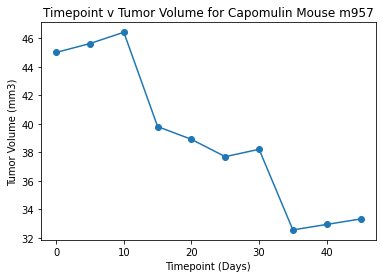

In [210]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create dataframe with only Capomulin data
capomulin_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
capomulin_df

# Get all Mouse IDs for Capomulin regimen
mouse_ids = capomulin_df['Mouse ID']

# Select a random mouse ID
mouse_id = random.choice(mouse_ids)

# Get the data for that mouse
mouse_data = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Plot timpoint vs tumor volume for that mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker = 'o')

# Add labels
plt.title(f"Timepoint v Tumor Volume for Capomulin Mouse {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


# Display
plt.show()


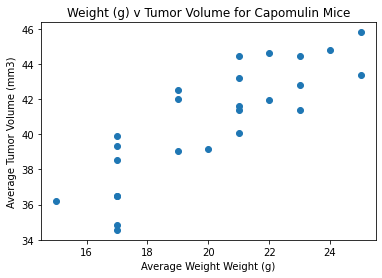

In [208]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group by Capomulin Mouse ID and get averages
capomulin_avg= capomulin_df.groupby(['Mouse ID']).mean()

# Assign to variables
avg_vol = capomulin_avg["Tumor Volume (mm3)"]
avg_wt = capomulin_avg["Weight (g)"]

# Plot 
plt.scatter(avg_wt, avg_vol)

# Add labels
plt.title(f"Weight (g) v Tumor Volume for Capomulin Mice")
plt.xlabel("Average Weight Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


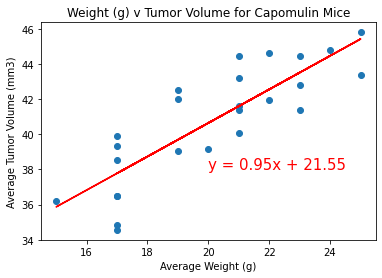

In [209]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform correlation calculation
correlation = st.pearsonr(avg_wt, avg_vol)

# Display
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_wt, avg_vol)
regress_values = avg_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot with linear regression line
plt.scatter(avg_wt,avg_vol)
plt.plot(avg_wt,regress_values,"r-")

#Annotate line
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

# Add labels
plt.title(f"Weight (g) v Tumor Volume for Capomulin Mice")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()